In [1]:
import types 
import pandas as pd 
from botocore.client import Config 
import ibm_boto3 

def __iter__(self): return 0 

# Credentials manually removed

df_data_1 = pd.read_csv(body) 
df_data_1.head() 

Bucket='edxcapstoneproject-donotdelete-pr-rtwrvy0qwy0il4'
df_data_1.to_pickle('./df_raw.pkl')
client_ab1e63cc4b8a4277aa07057ec54c2f52.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')
client_ab1e63cc4b8a4277aa07057ec54c2f52.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')
HPD_df = pd.read_pickle('./df_raw_local.pkl')

In [2]:
## Here we will look for prioritary areas both in GENERAL CONSTRUCTIONS and HEATING & HEAT/HOT WATER
print("Looking for prioritary areas...")

Looking for prioritary areas...


In [3]:
##Checking df
HPD_df.head()

##DF with priorities
df_con = HPD_df.loc[(HPD_df["complaint_type"] == ("GENERAL CONSTRUCTION"))]            

In [4]:

#Lets check it
df_con["complaint_type"].value_counts()

GENERAL CONSTRUCTION    500863
Name: complaint_type, dtype: int64

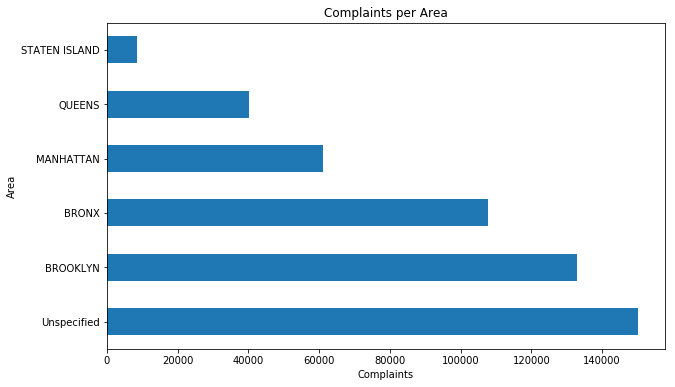

In [6]:
#barchart ftw
import matplotlib.pyplot as plt
df_borough = df_con["borough"].value_counts()

df_borough.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Complaints') # add to x-label to the plot
plt.ylabel('Area') # add y-label to the plot
plt.title('Complaints per Area') # add title to the plot

plt.show()

In [9]:
### The data is too scattered to be conclusive when it comes to GENERAL CONSTRUCTION, probably because of the nature of the complaint,
### still, besides unspecified complaints, BROOKLYN and BRONX appear to have the majority of the issues
### Let's check also HEATING and HOT WATER issues

In [11]:
df_water = HPD_df.loc[(HPD_df["complaint_type"] == ("HEAT/HOT WATER"))]  
df_heat = HPD_df.loc[(HPD_df["complaint_type"] == ("HEATING"))]  
df_waterheat = pd.merge(df_water, df_heat, how="outer")

df_waterheat["complaint_type"].value_counts()

HEAT/HOT WATER    1148903
HEATING            887869
Name: complaint_type, dtype: int64

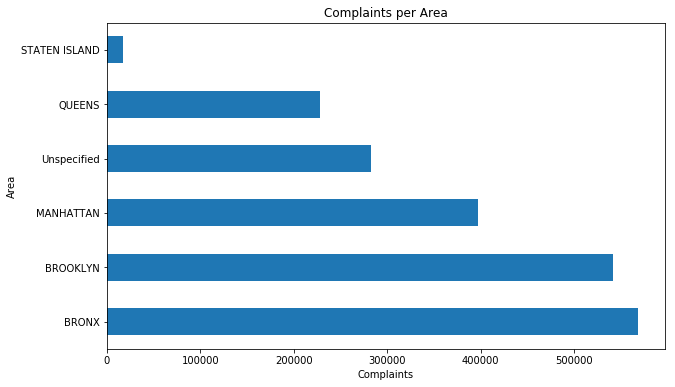

In [12]:
# let's plot for heating and how water now

df_borough = df_waterheat["borough"].value_counts()

df_borough.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Complaints') # add to x-label to the plot
plt.ylabel('Area') # add y-label to the plot
plt.title('Complaints per Area') # add title to the plot

plt.show()


In [13]:
print("Now looking for complaints based on Zip Codes...")

Now looking for complaints based on Zip Codes...


HEATING AND HEAT/HOT WATER COMPLAINTS BY ZIP CODE


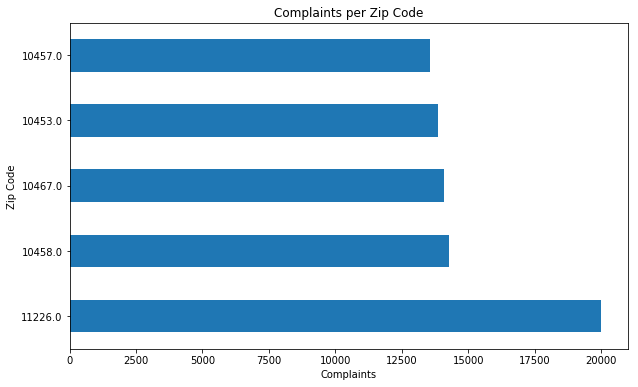

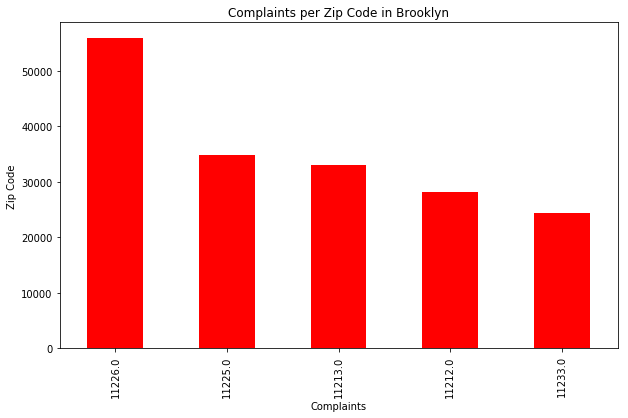

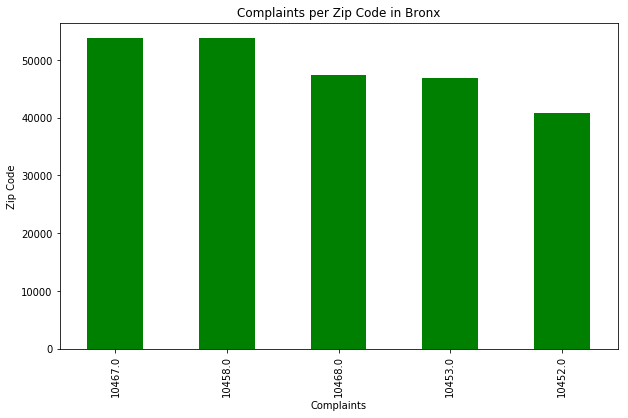

In [15]:
#Looking for zip codes:

print("HEATING AND HEAT/HOT WATER COMPLAINTS BY ZIP CODE")

df_zip = df_con["incident_zip"].value_counts().head()

df_zip.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Complaints') # add to x-label to the plot
plt.ylabel('Zip Code') # add y-label to the plot
plt.title('Complaints per Zip Code') # add title to the plot

plt.show()

df_zip = df_waterheat.loc[df_waterheat["borough"] == "BROOKLYN"]
df_zip = df_zip["incident_zip"].value_counts().head()

df_zip.plot(kind='bar', figsize=(10, 6), color="red")

plt.xlabel('Complaints') # add to x-label to the plot
plt.ylabel('Zip Code') # add y-label to the plot
plt.title('Complaints per Zip Code in Brooklyn') # add title to the plot

plt.show()

df_zip = df_waterheat.loc[df_waterheat["borough"] == "BRONX"]
df_zip = df_zip["incident_zip"].value_counts().head()

df_zip.plot(kind='bar', figsize=(10, 6), color="green")

plt.xlabel('Complaints') # add to x-label to the plot
plt.ylabel('Zip Code') # add y-label to the plot
plt.title('Complaints per Zip Code in Bronx') # add title to the plot

plt.show()

In [36]:
### While Brooklyn and Bronx appear to be the areas with most complaints related to the priority issues, BRONX have 4 of the 5 ZIP with most
### complaints for Heating and Hot Water, with a certain uniformity and most likely is the best option for some long-term interventions

In [40]:
print("Analysis apoints that HPD should focus on solving issues at Bronx area")

Analysis apoints that HPD should focus on solving issues at Bronx area
